In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

%matplotlib inline

In [2]:
# read data file
df = pd.read_excel('./Distillation Data 2020-08-20 for Blog.xlsx')
df.head()

,Unnamed: 0,Reflux ratio,D/F,Pressure,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,Impurity
0,NaN,2.887537,0.403726,48.980834,NaN,NaN,100.268473,NaN,112.328178,120.827117,129.704816,NaN,149.658015,NaN,NaN,163.896582,166.574718,169.866201,NaN,0.011651
1,NaN,2.959575,0.389883,47.337787,NaN,94.812792,96.839901,NaN,NaN,112.085992,120.805074,NaN,141.281224,149.442104,155.274783,159.123603,161.893418,NaN,170.810737,0.007149
2,NaN,2.660605,0.418623,43.523609,83.951394,NaN,89.685128,94.648442,NaN,NaN,116.889379,125.914637,135.582649,143.128673,147.365776,149.532638,152.277614,NaN,156.723471,0.005780
3,NaN,2.781381,0.454618,46.675383,91.083622,96.518298,104.731650,115.339067,NaN,133.628745,138.957221,NaN,151.458543,155.504138,158.229142,159.971603,NaN,162.920535,165.800038,NaN
4,NaN,2.716885,0.437781,43.659927,NaN,83.925892,NaN,85.897024,NaN,NaN,99.793446,111.265397,NaN,126.147318,135.020133,142.614103,147.707465,152.792045,156.201534,-0.001702


In [3]:
# examine statistics for each column
df.describe()

,Unnamed: 0,Reflux ratio,D/F,Pressure,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,Impurity
count,0.0,176.000000,176.000000,186.000000,156.000000,160.000000,151.000000,151.000000,157.000000,161.000000,164.000000,150.000000,163.000000,174.000000,167.000000,159.000000,173.000000,167.000000,186.000000,180.000000
mean,NaN,2.967819,0.396523,45.206274,89.852747,91.826943,94.553149,99.601964,105.290243,112.848150,121.157753,128.522748,138.562404,144.328985,149.886505,154.155923,156.442074,158.805782,163.583016,0.014745
std,NaN,0.276710,0.038782,3.004788,4.864702,5.582775,6.494995,8.187016,9.610557,9.679790,9.848028,8.815226,8.699178,9.437204,8.915455,7.919886,7.336991,6.694508,7.521034,0.020975
min,NaN,2.531154,0.332041,40.128743,80.057366,82.867167,85.174157,85.897024,88.329262,90.695348,95.490469,99.975936,103.653712,106.789908,110.618707,114.535065,120.000829,129.046709,139.477227,-0.002952
25%,NaN,2.738165,0.362000,42.574645,85.884442,87.664305,90.082917,93.706047,98.115531,105.822392,114.462394,121.691040,133.035699,139.793473,145.877794,150.169011,152.548343,154.651869,158.048095,0.006466
50%,NaN,2.920075,0.392921,45.491659,89.624956,91.426019,94.008099,98.610443,103.564082,112.281896,121.795990,129.521741,140.001202,145.894584,151.033281,154.989420,156.910649,159.191631,163.423772,0.008910
75%,NaN,3.151378,0.429766,47.911302,93.262827,95.184110,97.724572,103.513191,111.779693,120.368113,128.517391,135.001975,144.547017,151.307724,156.107393,159.614122,161.784279,163.794493,169.250420,0.014312
max,NaN,3.493731,0.469918,49.984843,105.596343,114.920984,124.359541,132.069831,137.412089,140.859925,143.412368,150.989362,158.971883,161.942997,166.194423,169.354312,171.556007,170.572191,183.463665,0.124914


In [4]:
# remove rows (if any) that have with all missing values
df.dropna(axis=0, how='all', inplace=True)

# remove columns (if any) that have all missing values
df.dropna(axis=1, how='all', inplace=True)

# drop rows that have a missing value for impurity
df.dropna(subset=['Impurity'], axis=0, inplace=True)

# the above statistics show some observations with negative impurity levels. 
# these should be treated as bad data and removed from the data set.
df = df[df['Impurity'] > 0]

# display statistics for each measurement
df.describe()

,Reflux ratio,D/F,Pressure,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,Impurity
count,151.000000,150.000000,159.000000,133.000000,139.000000,134.000000,129.000000,137.000000,142.000000,141.000000,131.000000,146.000000,150.000000,143.000000,140.000000,154.000000,142.000000,160.000000,173.000000
mean,2.972393,0.395426,45.099831,89.839414,91.807436,94.720716,99.658808,105.461689,112.798723,121.940995,129.234135,138.799011,145.373585,150.636454,154.823413,157.046866,159.048066,164.031735,0.015394
std,0.277654,0.038534,3.073496,4.962613,5.675205,6.557479,7.937679,9.197493,8.942656,8.859434,8.032545,8.542886,8.230005,7.891169,7.148064,6.706651,6.371452,7.470701,0.021141
min,2.531154,0.332698,40.128743,81.460222,83.650902,85.472536,86.664586,88.867503,93.032653,96.294694,99.975936,103.653712,106.789908,110.618707,115.085944,120.918759,129.046709,139.477227,0.001096
25%,2.737204,0.360749,42.425548,85.727697,87.659812,90.158521,93.830879,98.608883,105.927610,115.000803,123.460698,133.263643,140.456313,146.237766,150.662088,152.854635,154.953956,158.653588,0.006598
50%,2.936583,0.389061,45.186698,89.428599,91.086405,94.492067,98.760861,103.810090,112.433037,122.533099,129.878273,140.253144,146.396894,151.611266,155.110569,157.414876,159.027447,163.594432,0.009274
75%,3.151827,0.429053,48.005676,93.293177,95.058481,97.778664,103.464809,111.676833,119.022140,128.420010,134.890593,144.338975,151.307724,156.058731,159.882453,161.923730,164.051335,169.423523,0.015310
max,3.493731,0.469918,49.984843,105.596343,114.920984,124.359541,132.069831,137.412089,140.859925,143.412368,150.989362,158.971883,161.942997,166.194423,169.354312,171.556007,170.133244,183.463665,0.124914


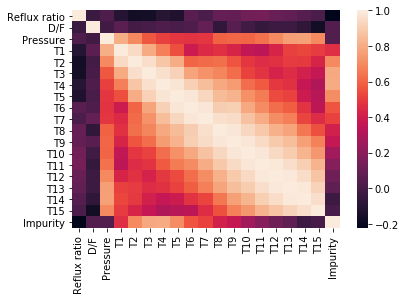

In [5]:
# create a heat map to find which variables are strongly correlated with the impurity
sns.heatmap(df.corr())

### The impurity level has the highest (positive or negative) correlations with the temperatures on trays 1-7 (T1 - T7)

### The next section builds a model with missing values replaced with the mean for the column.

In [6]:
# replace missing values with the mean for that column
fill_mean = lambda col: col.fillna(col.mean())
# Fill the mean
fill_df = df.apply(fill_mean, axis=0)

In [7]:
fill_df.describe()

,Reflux ratio,D/F,Pressure,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,Impurity
count,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,2.972393,0.395426,45.099831,89.839414,91.807436,94.720716,99.658808,105.461689,112.798723,121.940995,129.234135,138.799011,145.373585,150.636454,154.823413,157.046866,159.048066,164.031735,0.015394
std,0.259289,0.035865,2.945758,4.347435,5.083430,5.766317,6.847536,8.178520,8.096771,7.992926,6.983299,7.843762,7.660005,7.170035,6.425865,6.325389,5.768777,7.182832,0.021141
min,2.531154,0.332698,40.128743,81.460222,83.650902,85.472536,86.664586,88.867503,93.032653,96.294694,99.975936,103.653712,106.789908,110.618707,115.085944,120.918759,129.046709,139.477227,0.001096
25%,2.755919,0.368530,42.580549,86.758130,88.350612,91.415061,96.501099,99.474200,107.270100,116.506835,126.697886,135.274312,141.522243,147.094101,152.025145,153.094817,155.527734,159.061160,0.006598
50%,2.972393,0.395426,45.099831,89.839414,91.807436,94.720716,99.658808,105.461689,112.798723,121.940995,129.234135,138.799011,145.373585,150.636454,154.823413,157.046866,159.048066,164.031735,0.009274
75%,3.115072,0.421003,47.852122,92.301789,94.473368,96.701649,101.751517,109.391731,117.494268,127.396214,133.534936,143.875946,150.543185,154.993178,158.999844,161.591235,163.331015,169.279086,0.015310
max,3.493731,0.469918,49.984843,105.596343,114.920984,124.359541,132.069831,137.412089,140.859925,143.412368,150.989362,158.971883,161.942997,166.194423,169.354312,171.556007,170.133244,183.463665,0.124914


In [8]:
# create as X all the columns except Impurity
X = fill_df.drop(['Impurity'], axis=1)
    
# create as y the Impurity column
y = fill_df['Impurity']

In [9]:
# instantiate a linear regression object
# normalized the data since the magnitudes of the measurements are different (temperatures are of the order of 100)
lm_model = LinearRegression(normalize=True)

In [10]:
# split the data set into a training set and a test set. set aside 30% of the data for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)

In [11]:
# train the linear regression model
lm_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [12]:
# use the trained model to predict the test outputs
y_test_pred = lm_model.predict(X_test)

In [13]:
# score the model on the training set
y_train_pred = lm_model.predict(X_train)
train_score = r2_score(y_train, y_train_pred)
train_score

0.8788577011602413

In [14]:
# score the model on the test set
test_score = r2_score(y_test, y_test_pred)
test_score

0.8163508010390117

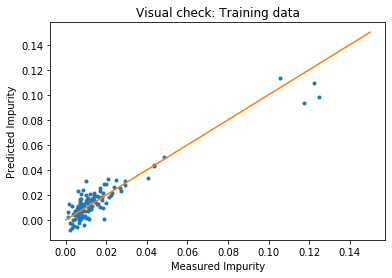

In [15]:
# a plot of the training set impurity versus the predicted training set impurity will help to spot problems
plt.plot(y_train, y_train_pred, '.')
plt.plot([0,0.15],[0,0.15])
plt.xlabel('Measured Impurity')
plt.ylabel('Predicted Impurity')
plt.title('Visual check: Training data')
plt.show()

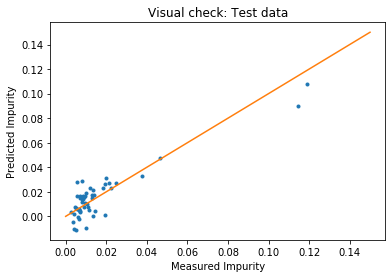

In [16]:
# a plot of the test set impurity versus the predicted test set impurity will help to spot problems
plt.plot(y_test, y_test_pred, '.')
plt.plot([0,0.15],[0,0.15])
plt.xlabel('Measured Impurity')
plt.ylabel('Predicted Impurity')
plt.title('Visual check: Test data')
plt.show()

### There appears to be a bias in the prediction of the test set. The model under-predicts at the upper end of the range for the training set and the test set. This will be a problem if this model is deployed.

### Perhaps something other than a linear regression model will fix the problem.